In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from numpy.random import *

In [5]:
# def _kernel_function(x):

#   # 線形カーネル
#   for _ in range(self.iter):
#     kernel_answer = x[-2].T @ x[-1]
#   return kernel_answer

# x = np.arange(20).reshape(10, 2)

# # print(x.T)
# # print(x)
# print(_kernel_function(x)) #685
# kernel_func = _kernel_function(x)

In [6]:
# def _Lagrange_gradient_descent(x):
#   # 標準正規分布の乱数（平均0、分散１）をlamdaに格納
#   lamda = np.random.randn(x.shape[1]+1)
#   # lamda_listの最初の要素にlamdaを入れる
#   # lamda_list[0] =lamda
#   # 更新ごとにlamda >= 0である必要がある＝ifで条件分岐？
#   calc_1 = 1 - sum(lamda * y[-2] * y[-1] * kernel_func)
  
#   lamda[:-1] = lamda[:-1] + lr * calc_1
#     # self.lamda[-1] = self.lamda[-1] - (self.lr * np.sum((error/x.shape[0]))) 線形からコピペしただけ。必要か要確認
#     #self.lamda = self.lamda - self.lr * calc_1

#   return calc_1
# print(_Lagrange_gradient_descent(x))


In [7]:
# シンプルデータセット1作成コード
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, n_samples // 2)
f1 = np.random.multivariate_normal(f1, cov, n_samples // 2)
# 完成
x = np.concatenate([f0, f1])
y = np.concatenate([
    np.full(n_samples // 2, 1),
    np.full(n_samples // 2, -1)
])
# targetは１か−１
# print(x.shape)
# print(y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
print(x_train.shape)
# print(x_test.shape)

print(y_train.shape)
# print(y_test.shape)

# print(x_train, x_test, y_train, y_test)
# lamda = np.random.randn(x_train.shape[0])
# print(x_train)
# print(y_train)
# print(lamda)
print(x_train[5].T @ x_train[5])
# print(y_train[1, :])

(400, 2)
(400,)
5.887093966628042


$$ f(x) = \sum_{n=1}^{N}\lambda_{n} y_{sv_n} k(x, s_n)
$$

問題1　ラグランジュの未定乗数法による最急降下

問題２　サポートベクターの決定

問題３　推定

問題４　学習と推定

問題５　決定領域の可視化


In [83]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.x_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル
    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        # self.n_support_vectors
        #   # サポートベクターの数 int
        # self.index_support_vectors
        #   # サポートベクターのインデックス  : 次の形のndarray, shape (n_support_vectors,)
        # self.x_sv 
        #   # サポートベクターの特徴量 :  次の形のndarray, shape(n_support_vectors, n_features)
        # self.lam_sv_list
        #   # サポートベクターの未定乗数 :  次の形のndarray, shape(n_support_vectors, 1)
        # self.y_sv
        #   # サポートベクターのラベル :  次の形のndarray, shape(n_support_vectors, 1)
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        np.random.seed(1)

    def fit(self, x, y, x_test=None, y_test=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。
        Parameters
        ----------
        x : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        x_test : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_test : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        seed(0)
        # self.lam_sv_list = np.zeros(self.iter, x.shape[1])
        # ここにサポートベクターを格納する
        # self.sv_array = np.zeros(self.iter)
        self.lam_sv = np.random.randn(self.iter)
        self.kernel_func = self._kernel_function(x)
        self.new_lamda = self._lagrange_gradient_descent(x, y)
        self.w = np.ones(x.shape[0])

        # カーネル関数
        # 線形カーネル
        # 学習回数の分繰り返す
        kernel_answer = np.array([])
        for i in range(self.iter):
          # x.T @ x[i+1]
          kernel_a = x[i].T @ x[i-1]
          kernel_answer = np.append(kernel_answer, kernel_a)

        # if self.verbose:
        #     #verboseをTrueにした際は学習過程を出力
        #     print()

    # 問題１ ラグランジュの未定乗数法による最急降下
    def _lagrange_gradient_descent(self, x, y):

        # 更新ごとにself.lam_sv >= 0である必要がある＝ifで条件分岐？
        sigma = np.zeros(self.iter)
        for i in range(self.iter):
          for j in range(self.iter):
            sigma[j] += self.lam_sv[j] * (y[j-1] * y[j]) * (x[j-1].T @ x[j])

          # print(f'sigma{sigma}')
        self.lam_sv = self.lam_sv[-1] + self.lr * (1 - sigma)
        # 1 / 2 * (x.T @ x) -

        # 問題2 サポートベクターの決定
        # if文で、設定した閾値より大きな数字のself.lam_sv[n]をndarrayに追加していくコードを書く
        # サポートベクターを取り出す事ができてない?
        self.sv_array = self.lam_sv[self.lam_sv >= self.threshold]

        # return self.lam_sv
    def support_vectors(self):
      self.sv_array = np.array([self.sv_array])
      return self.sv_array

    # 問題３　推定
    # ここにカーネル関数(def)を組み込む
    def predict(self, x):


        result = np.where(self.lam_sv > 0, 1, -1)

        return result

    # 問題1　カーネル関数
    def _kernel_function(self, x):
        # カーネル関数
        # 線形カーネル
        # 学習回数の分繰り返す
        kernel_answer = np.array([])
        kernel_a = 0
        for i in range(x.shape[0]):
          kernel_a = x[i, :].T @ x[i, :]
            # kernel_answer = np.append(kernel_answer, kernel_a)

        # return kernel_a
        
MySVM = ScratchSVMClassifier(num_iter=100, lr=0.001, kernel='linear', threshold=1e-5)

MySVM.fit(x_train, y_train, x_test, y_test)
my_predict = MySVM.predict(x_test)
XX = MySVM.support_vectors()
# print(MySVM._lagrange_gradient_descent(x_train, y_train))
# print(x_train.shape,y_train.shape)
print(f'my_predict.shape : \n{my_predict.shape}')
print(f'my_predict : \n{my_predict}')


my_predict.shape : 
(100,)
my_predict : 
[ 1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1 -1 -1  1  1  1  1  1 -1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1
 -1  1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1 -1  1  1
  1 -1  1  1]


No handles with labels found to put in legend.


SVM
(100,)
predict : 
[-1  1  1  1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1
  1 -1  1 -1  1 -1  1  1  1 -1  1  1  1  1 -1 -1  1 -1 -1  1 -1 -1  1  1
  1 -1 -1  1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1  1
 -1  1  1  1 -1 -1  1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1  1 -1  1  1
  1 -1  1 -1]
train_score   : 
1.0
test_score   : 
1.0


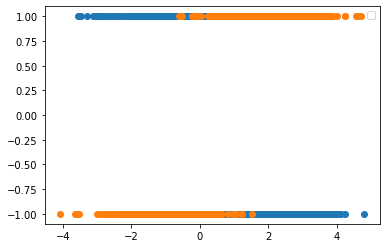

In [34]:
# 
# 2. SVM
# 

svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf.fit(x_train, y_train)
# 推定 predict
predict = svm_clf.predict(x_test)

# 結果 score
train_score = svm_clf.score(x_train, y_train)
test_score = svm_clf.score(x_test, y_test)


print('SVM')
print(predict.shape)
print(f'predict : \n{predict}')   
print(f'train_score   : \n{train_score}')
print(f'test_score   : \n{test_score}')


plt.scatter(x[:,0], y)
plt.scatter(x[:,1], y)
# plt.scatter(x[:,1], y)
plt.legend()
plt.show()

## 【問題5】決定領域の可視化

決定領域を可視化してください。

以下の例のようにサポートベクターは異なる色で示してください。

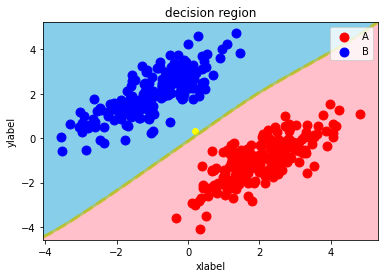

None


In [82]:
def decision_region(X, y, model, XX, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['A', 'B']):
    """

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
        # plt.scatter(X[y==target][:, 0], X[y==target][:, 1], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(XX[:, 0], XX[:, 1], color="yellow")
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
print(decision_region(x_train, y_train, svm_clf, XX))
# print(decision_region(x_train, y_train, MySVM, XX))